## **Projet :** Analyse des Données Énergétiques pour Améliorer la Gestion de la Consommation dans une Ville

# **Introduction**

# Dans un contexte de transition énergétique et de lutte contre le changement climatique, la gestion intelligente de l'énergie au niveau local est devenue une priorité. Ce projet a pour objectif d’analyser les données de consommation énergétique d’une ville afin d’identifier des tendances de consommation, de détecter d’éventuelles anomalies et de proposer des pistes d’amélioration concrètes pour optimiser l’utilisation des ressources énergétiques. En s’appuyant sur une analyse rigoureuse des données disponibles, ce travail vise à contribuer à une gestion plus durable, efficace et responsable de l’énergie au sein du territoire étudié.

# **Importation du DataSet  directement depuis kaggle**

In [1]:
# Pour importer des fichier
# Ici nous allons importé du clé téléchargée depuis kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrbrainouro","key":"eb7a2a6c000a0958b0f07f1f7c2c2e35"}'}

In [2]:
# Creation du dossier kaggle
!mkdir -p ~/.kaggle

In [3]:
# Creation de kaggle.json dans le dossier créé
!cp kaggle.json ~/.kaggle/

In [4]:
# Permission au fichier json
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Afficher la liste des DataSets disponoble
!kaggle datasets list

ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
abdulmalik1518/cars-datasets-2025                                 Cars Datasets (2025)                                     25987  2025-07-17 21:43:28.493000           5924        135  1.0              
sahilislam007/college-student-placement-factors-dataset           College Student Placement Factors Dataset               110450  2025-07-02 08:33:50.547000           8793        178  1.0              
khushikyad001/air-quality-weather-and-respiratory-health          Air Quality, Weather, and Respiratory Health            523894  2025-07-24 15:42:21.873000           1099         31  1.0     

In [6]:
# Importer le dataset de la consommation electrique
!kaggle datasets download -d fedesoriano/electric-power-consumption

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption
License(s): copyright-authors
  0% 0.00/1.36M [00:00<?, ?B/s]
100% 1.36M/1.36M [00:00<00:00, 580MB/s]


In [7]:
# Dezziper le dataset
!unzip electric-power-consumption.zip

Archive:  electric-power-consumption.zip
  inflating: powerconsumption.csv    


In [8]:
# Importation des bibliothèque nécessaire

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow,keras
from tensorflow.keras.layers import LSTM,RNN,ReLU,Dense,Dropout
from tensorflow.keras import Sequential
import tensorflow,keras
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [9]:
# Importation du dataset maintenant

data = pd.read_csv("powerconsumption.csv")

data.head(20)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
5,1/1/2017 0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
6,1/1/2017 1:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024
7,1/1/2017 1:10,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711
8,1/1/2017 1:20,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217
9,1/1/2017 1:30,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687


In [10]:
data.shape

(52416, 9)

# **Description des données**

Comme nous pouvons le voir, nous avons 52 416 consommations d'énergies enregistrées sur 9 variables différentes. Notemment :

**Date Heure :** Fenêtre temporelle de dix minutes.

**Température :** Température météorologique.

**Humidité :** Humidité de l’air.

**Vitesse du vent :** Vitesse du vent.

**Flux diffus généraux :** Le terme "flux diffus" désigne des fluides de basse température (< 0,2° à ~100°C) qui s’échappent lentement à travers des monticules de sulfures, des coulées de lave fracturées, des assemblages de tapis bactériens et de macrofaune.

**Flux diffus :** Quantité de flux diffus dans une zone donnée.

**Consommation d’énergie Zone 1 :** Énergie consommée dans la zone 1.

**Consommation d’énergie Zone 2 :** Énergie consommée dans la zone 2.

**Consommation d’énergie Zone 3 :** Énergie consommée dans la zone 3.

In [12]:
# Vérification si les variables ont été importées dans de bons types
data.dtypes

,0
Datetime,object
Temperature,float64
Humidity,float64
WindSpeed,float64
GeneralDiffuseFlows,float64
DiffuseFlows,float64
PowerConsumption_Zone1,float64
PowerConsumption_Zone2,float64
PowerConsumption_Zone3,float64


Ici le seul attribut qui semble problématique est la Datetime qui n'est pas considéré comme une date. On corrige cela par la fonction to_datetime de pandas.

In [13]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [14]:
# On revérifie si c'est OK
data.dtypes

,0
Datetime,datetime64[ns]
Temperature,float64
Humidity,float64
WindSpeed,float64
GeneralDiffuseFlows,float64
DiffuseFlows,float64
PowerConsumption_Zone1,float64
PowerConsumption_Zone2,float64
PowerConsumption_Zone3,float64


In [15]:
# Observons s'il y a des valeurs manquantes
data.isnull().sum()

,0
Datetime,0
Temperature,0
Humidity,0
WindSpeed,0
GeneralDiffuseFlows,0
DiffuseFlows,0
PowerConsumption_Zone1,0
PowerConsumption_Zone2,0
PowerConsumption_Zone3,0


In [16]:
# Les valeurs dupliquées à présent ?
data.duplicated().sum()

np.int64(0)

**Observations :**



*   Il n’y a aucune valeur manquante dans les données et aucun doublon.
*   Toutes les colonnes sont au format entier (integer).

**On n'a donc affaire qu'aux variables quantitatives continue.**



In [17]:
# Noms des colonnes
data.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

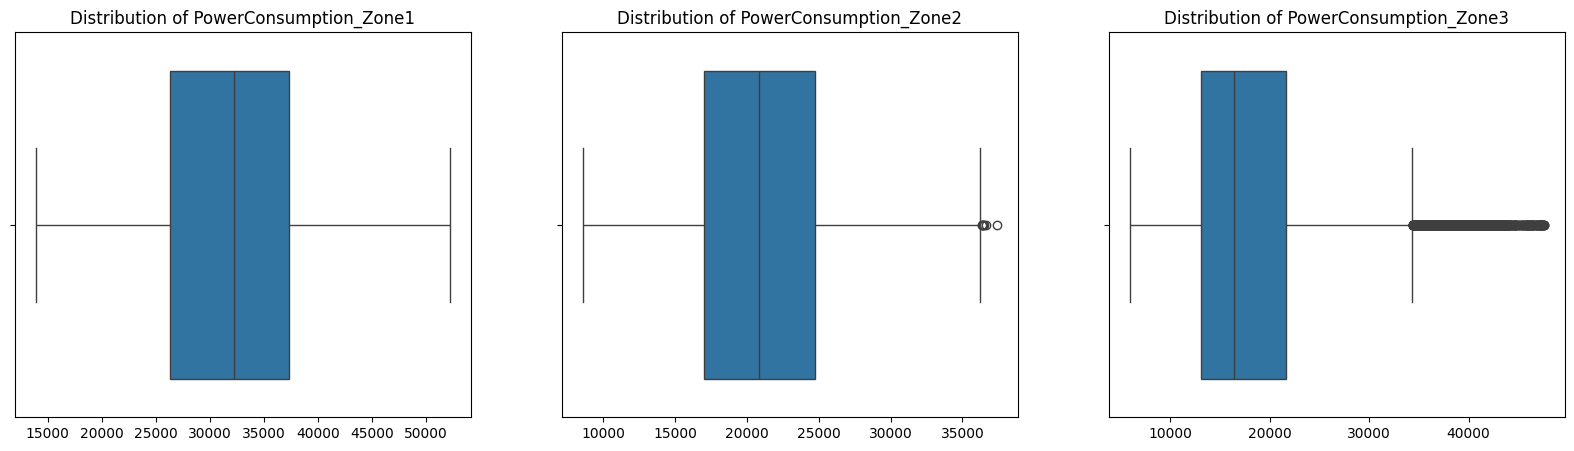

In [18]:
# Vérifications des outliers des trois zones de consommations

variables_consommation = ['PowerConsumption_Zone1','PowerConsumption_Zone2', 'PowerConsumption_Zone3']

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for index, var in enumerate(variables_consommation):
    sns.boxplot(data=data, x=var, ax=ax[index])
    ax[index].set_title(f'Distribution of {var}')
    ax[index].set_xlabel('')


**On constate qu'on des Outliers dans la zone 3**

In [26]:
# Fonction de visualisation pour nos variables
def plot_distribution(column):
    fig,ax=plt.subplots(1,3,figsize=(16,4))
    fig1=sns.histplot(x=data[column],bins=15,ax=ax[0])
    fig1.set(xlabel=None)
    fig2=sns.barplot(x=data[column].round(0),y=data['PowerConsumption_Zone1']+data['PowerConsumption_Zone2']+data['PowerConsumption_Zone3'],ax=ax[1])
    fig2.set(xlabel=None)
    fig3=sns.boxplot(x=data[column],ax=ax[2])
    fig3.set(xlabel=None)
    fig.supxlabel(column)
    plt.tight_layout()
    plt.show()

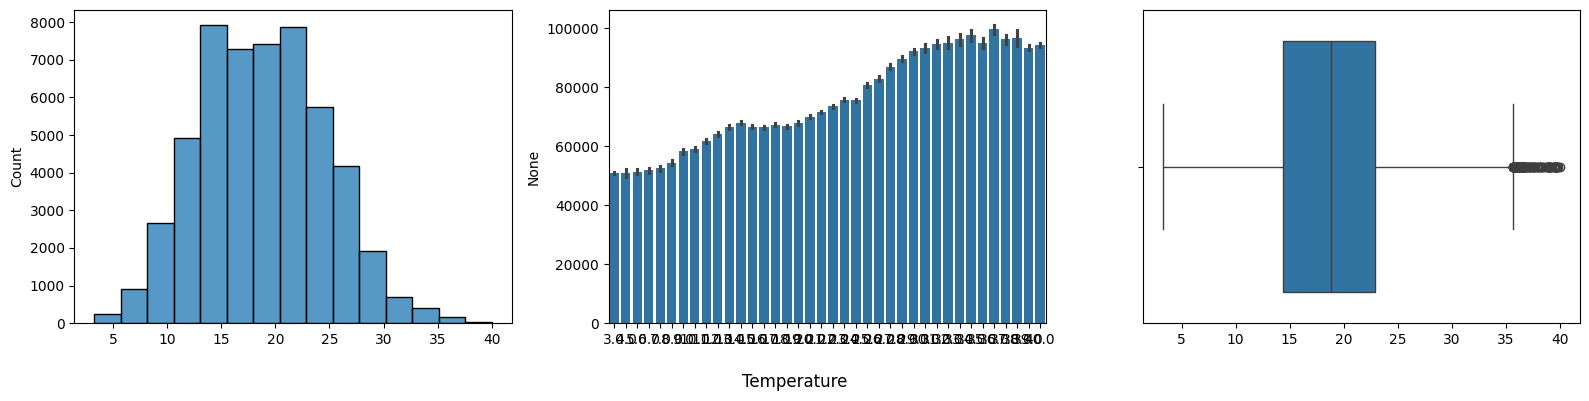

In [27]:
plot_distribution('Temperature')

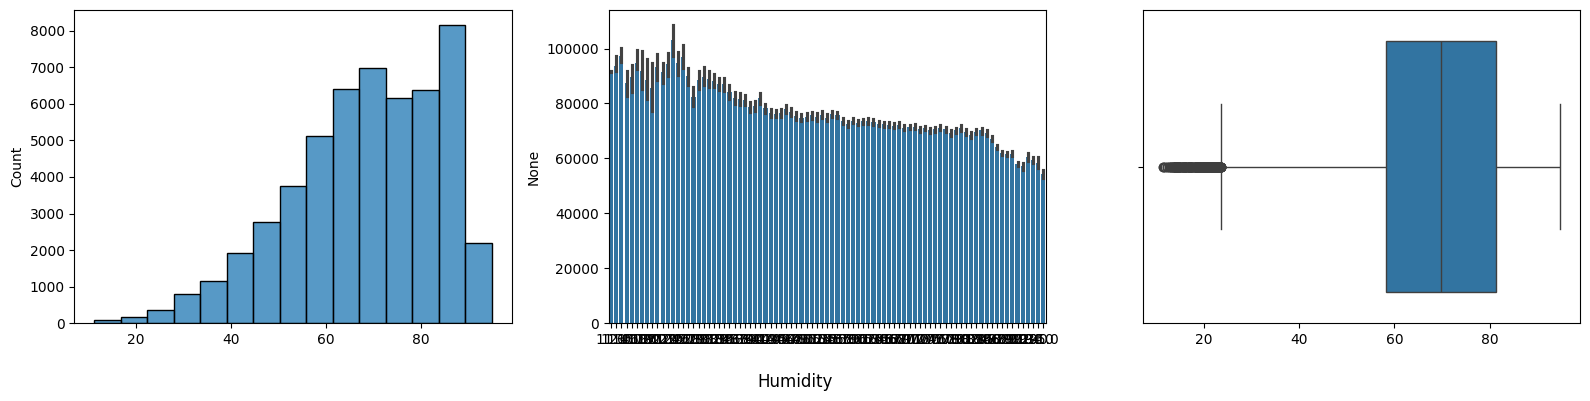

In [28]:
plot_distribution('Humidity')

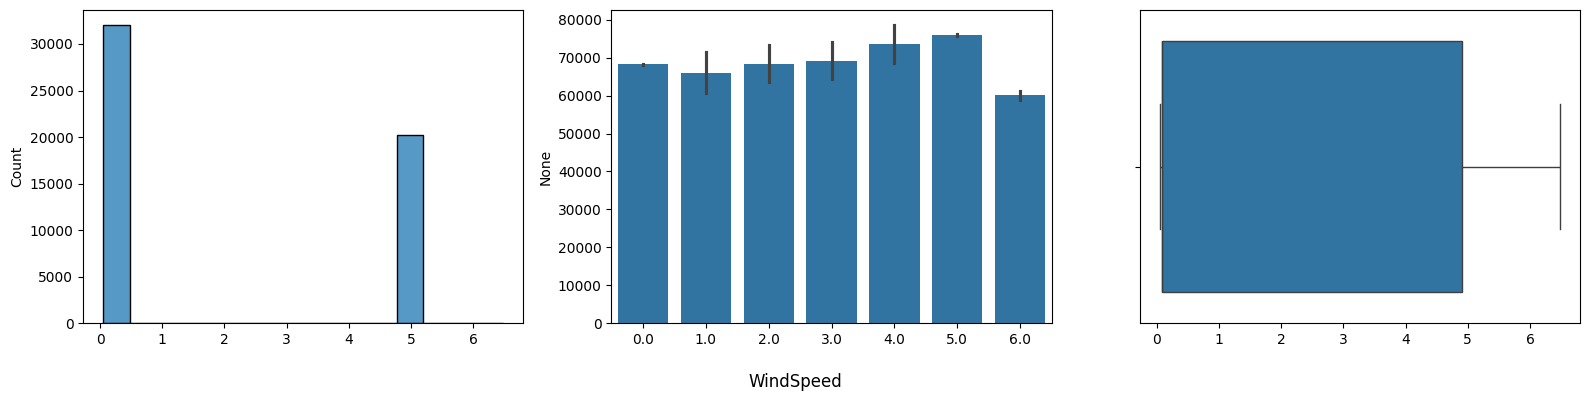

In [29]:
plot_distribution('WindSpeed')

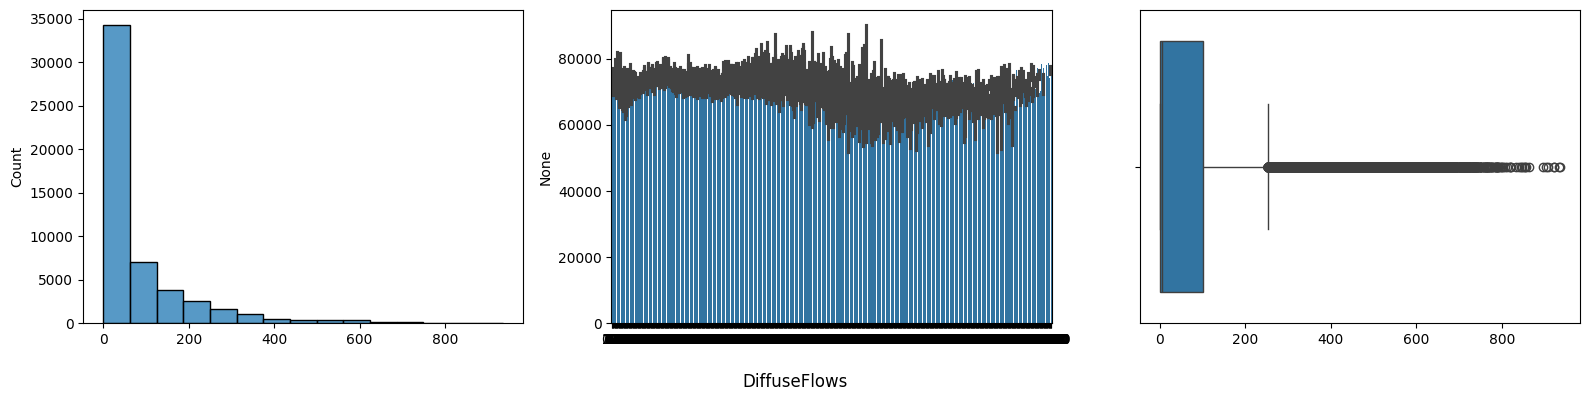

In [30]:
plot_distribution('DiffuseFlows')

# **Observations :**



*   Quand l'humidité augmente, la consommation de l'énergie baisse. Cela peut s'expliquer par l'utilisation moindre du chauffage par exemple.


*   Quand la température augmente, la consommation augmente également. Ce qui peut s'expliquer par la periode de chaleur où les gens utilisent de la climatisation et des ventilateurs.



In [31]:
# On crée une copie du DataFrame principal pour ne pas altérer les données originales
data_ = data.copy()

# On effectue un regroupement temporel toutes les 12 heures
# 1. On définit 'Datetime' comme index temporel
# 2. On regroupe les données par tranche de 12h
# 3. On calcule la moyenne pour chaque groupe
# 4. On remet 'Datetime' en colonne normale
resample_data = data_.set_index('Datetime').resample('12h').mean().reset_index()

# On importe Plotly Graph Objects pour créer des graphiques interactifs
import plotly.graph_objects as go

# Création d'une courbe pour chaque zone de consommation
fig1 = go.Figure([
    go.Scatter(x=resample_data['Datetime'], y=resample_data['PowerConsumption_Zone1'], name='Zone 1')
])

fig2 = go.Figure([
    go.Scatter(x=resample_data['Datetime'], y=resample_data['PowerConsumption_Zone2'], name='Zone 2')
])

fig3 = go.Figure([
    go.Scatter(x=resample_data['Datetime'], y=resample_data['PowerConsumption_Zone3'], name='Zone 3')
])

# On utilise make_subplots pour combiner plusieurs courbes dans un seul graphique
from plotly.subplots import make_subplots
fig = make_subplots()

# On ajoute chaque courbe dans la figure principale
fig.add_trace(fig1.data[0])
fig.add_trace(fig2.data[0])
fig.add_trace(fig3.data[0])

# Personnalisation des axes et le titre
fig.update_layout(
    title="Consommation d'énergie par zone (moyenne toutes les 12h)",
    xaxis_title="Date",
    yaxis_title="Consommation (kWh)",
    legend_title="Zones"
)

# Affichage du graphique final
fig.show()


# On remarque la zone qui a la consommation la plus elévéee c'est la zone 1, suivie de la 2 et 3. Cela peut s'expliquer de divers raisons. Par exemple une densité de population plus importante, une activité économique plus intense ou la présence de bâtiments fortement énergivores.

# **Modèle prédictif**

In [32]:
# On enlève les colonnes de consommation pour ne garder que les variables météo, heure, etc.
X = data.drop(columns=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'])

# On extrait les colonnes de consommation d’énergie comme cibles (sous forme de tableau NumPy)
Y = data[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].to_numpy()


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1, shuffle=False, random_state=23
)

x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, test_size=0.1, shuffle=False, random_state=23
)


In [35]:
from datetime import datetime as dt

# Fonction pour enrichir le DataFrame avec des colonnes temporelles utiles
def column_extractor(data_t):
    data_f = data_t.copy()  # On travaille sur une copie pour préserver les données d'origine

    if 'Datetime' in data_f.columns:
        # Conversion de la colonne en format datetime et suppression du fuseau horaire
        data_f['Datetime'] = pd.to_datetime(data_f['Datetime']).dt.tz_localize(None)

        # Mise en index de la colonne 'Datetime' pour rééchantillonnage
        data_f.set_index('Datetime', inplace=True)

        # Rééchantillonnage : moyenne toutes les 10 minutes
        data_f = data_f.resample('10 min').mean()

        # Réinitialisation de l'index pour remettre 'Datetime' comme colonne
        data_f.reset_index(inplace=True)

        # Extraction des composantes temporelles
        data_f['minute'] = data_f['Datetime'].dt.minute
        data_f['hour_of_the_day'] = data_f['Datetime'].dt.hour
        data_f['day_of_the_week'] = data_f['Datetime'].dt.dayofweek      # 0 = lundi, 6 = dimanche
        data_f['day_of_the_month'] = data_f['Datetime'].dt.day
        data_f['month'] = data_f['Datetime'].dt.month
        data_f['quater'] = data_f['Datetime'].dt.quarter

        # Indicateur si c'est le week-end (1 = samedi ou dimanche, 0 sinon)
        data_f['is_weekend'] = data_f['day_of_the_week'].isin([5, 6]).astype(int)

        # Indicateur jour ou nuit : 1 si heure entre 6h et 18h, sinon 0
        data_f['Day_or_night'] = np.where(
            (data_f['hour_of_the_day'] < 19) & (data_f['hour_of_the_day'] > 5), 1, 0
        )

        # Indicateur heures de travail : 1 si heure entre 9h et 22h, sinon 0
        data_f['Working_hours'] = np.where(
            (data_f['hour_of_the_day'] < 23) & (data_f['hour_of_the_day'] > 8), 1, 0
        )

        # Indicateur heures de pointe : 1 si heure entre 18h et 23h59, sinon 0
        data_f['Peak_usage_hours'] = np.where(
            (data_f['hour_of_the_day'] < 24) & (data_f['hour_of_the_day'] > 17), 1, 0
        )

        # Suppression de la colonne 'Datetime' devenue inutile
        data_f.drop(columns='Datetime', inplace=True)

        return data_f

    else:
        print("Impossible de trouver la colonne 'Datetime'. Aucune nouvelle variable n'a été créée.")
        return data_f


In [34]:
x_train_n=column_extractor(x_train)

In [ ]:
print(x_train_n[['day_of_the_week', 'is_weekend']].drop_duplicates().sort_values('day_of_the_week'))


     day_of_the_week  is_weekend
144                0           0
288                1           0
432                2           0
576                3           0
720                4           0
864                5           1
0                  6           1


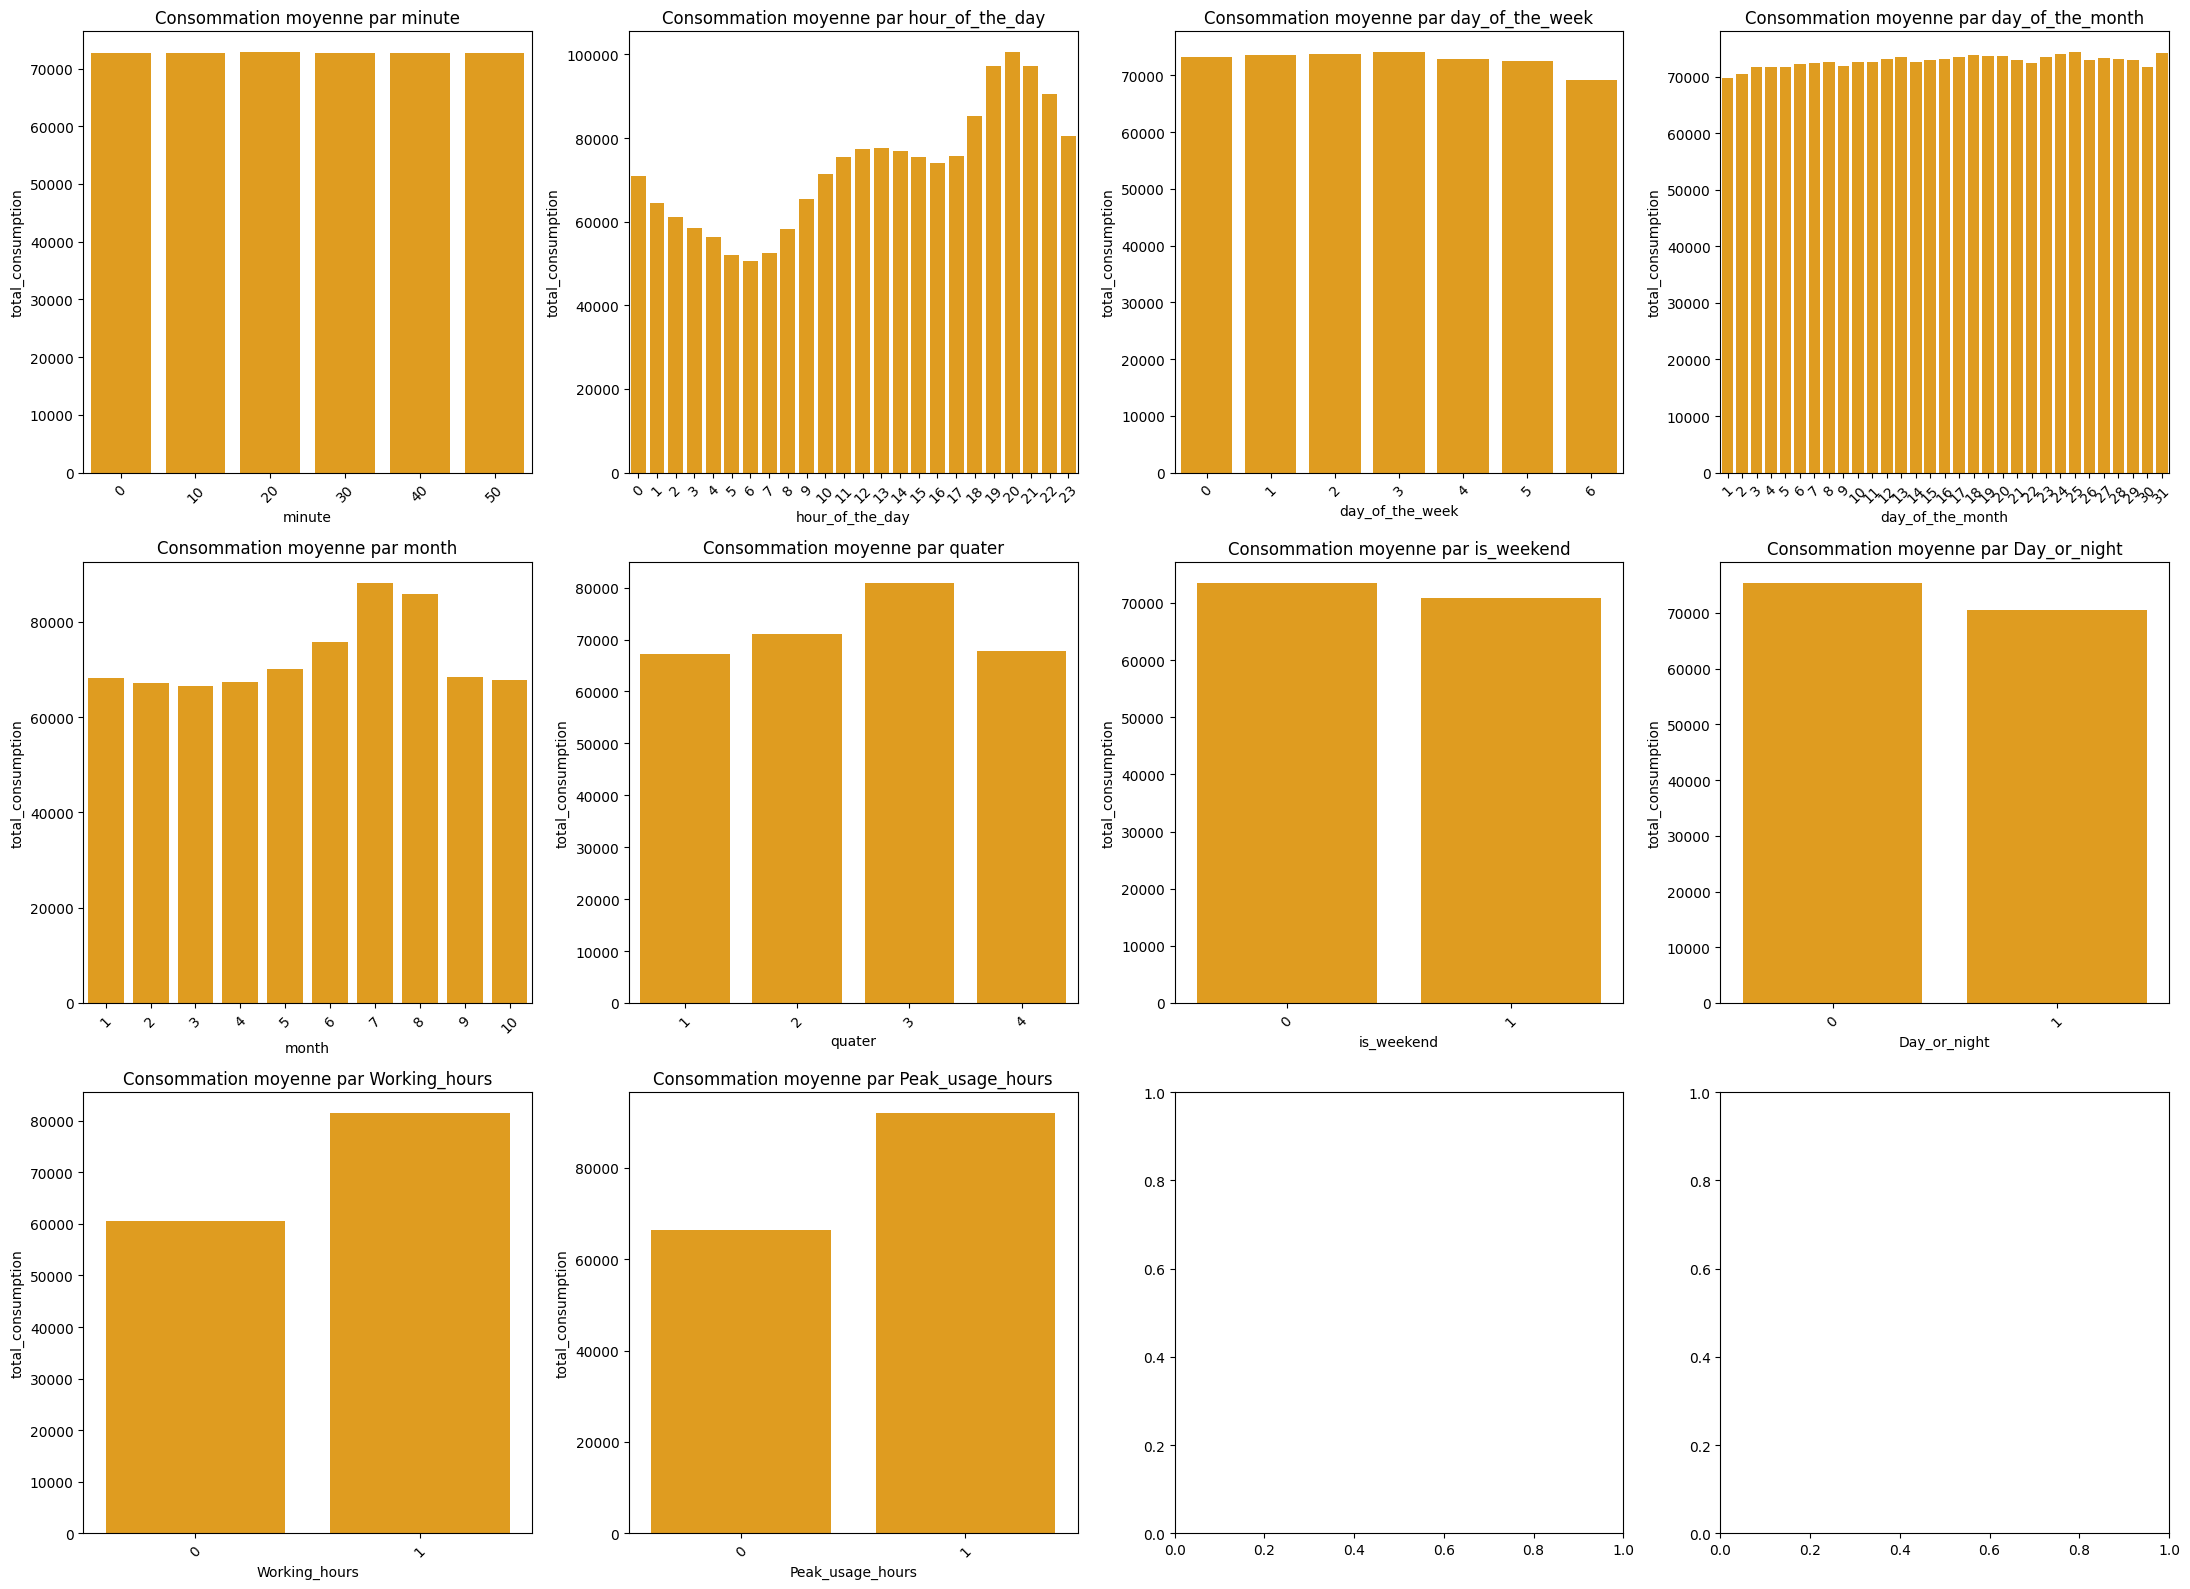

In [59]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(22, 16))
list_df = []

for i, col in enumerate([
    'minute', 'hour_of_the_day', 'day_of_the_week', 'day_of_the_month',
    'month', 'quater', 'is_weekend', 'Day_or_night',
    'Working_hours', 'Peak_usage_hours'
]):
    # Créer une copie du dataframe d’entraînement avec la consommation totale
    temp_df = x_train_n.copy()
    temp_df['total_consumption'] = (
        data['PowerConsumption_Zone1'][:x_train.shape[0]] +
        data['PowerConsumption_Zone2'][:x_train.shape[0]] +
        data['PowerConsumption_Zone3'][:x_train.shape[0]]
    )

    # Moyenne de la consommation par catégorie de la variable `col`
    grouped = temp_df.groupby(col)['total_consumption'].mean().reset_index()

    # Tracer avec sns.barplot (x = catégorie, y = moyenne)
    sns.barplot(data=grouped, x=col, y='total_consumption', ax=ax[i // 4, i % 4], color="orange")

    # Ajouter un titre au sous-graphe
    ax[i // 4, i % 4].set_title(f'Consommation moyenne par {col}', fontsize=12)
    ax[i // 4, i % 4].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [60]:
import pandas as pd

list_df = []

for col in [
    'minute', 'hour_of_the_day', 'day_of_the_week', 'day_of_the_month',
    'month', 'quater', 'is_weekend', 'Day_or_night',
    'Working_hours', 'Peak_usage_hours'
]:
    temp_df = x_train_n.copy()
    temp_df['total_consumption'] = (
        data['PowerConsumption_Zone1'][:x_train.shape[0]] +
        data['PowerConsumption_Zone2'][:x_train.shape[0]] +
        data['PowerConsumption_Zone3'][:x_train.shape[0]]
    )

    grouped = temp_df.groupby(col)['total_consumption'].mean().reset_index()
    grouped.columns = ['category_value', 'avg_consumption']
    grouped['category_name'] = col
    list_df.append(grouped)

# Concaténer tout en un seul fichier
final_df = pd.concat(list_df, ignore_index=True)

# Exporter
final_df.to_csv("consommation_moyenne_par_variable.csv", index=False)


# **Observations**

- La consommation maximale d'électricité se situe entre 10h et 22h.

- De manière générale, la charge est plus faible durant le week-end.

- Pendant l'été (mois 6 à 8), la demande augmente fortement.

- La nuit, la charge est plus elévée.




# **Préparation des données pour l'entrainement du modèle**

In [43]:
# Mise à l'échelle de nos données d'entrée
pre_processing = Pipeline([('scaler', MinMaxScaler())])
# Apprentissage des min/max sur x_train_n puis transformation (mise à l’échelle entre 0 et 1)
scaled_x_train = pre_processing.fit_transform(x_train_n)

# Préparation du jeu de test
# Extraction des colonnes temporelles du jeu de test
X_test_n = column_extractor(X_test)
# Application de la mise à l’échelle avec les paramètres appris sur x_train_n
scaled_x_test = pre_processing.transform(X_test_n)

# Préparation du jeu de validation
# Extraction des colonnes temporelles du jeu de validation
x_val_n = column_extractor(x_val)
# Application de la mise à l’échelle avec les paramètres appris sur x_train_n
scaled_x_val = pre_processing.transform(x_val_n)


In [38]:
target_scaling=MinMaxScaler().fit(y_train)

# Préparation de la variable cible
scaled_y_train=target_scaling.transform(y_train)
scaled_y_test=target_scaling.transform(Y_test)
scaled_y_val=target_scaling.transform(y_val)

In [39]:
# Dimensions de nos jeu de données
print(scaled_x_train.shape,scaled_x_test.shape,scaled_x_val.shape)



(42456, 15) (5242, 15) (4718, 15)


In [40]:
# Dimensions des cibles, target
print(scaled_y_train.shape,scaled_y_test.shape,scaled_y_val.shape)


(42456, 3) (5242, 3) (4718, 3)


In [41]:
# Définition de la taille du batch (nombre d'exemples traités en même temps)
batch = 50

# Longueur de la séquence temporelle (exemple : 24 heures)
window_length = 24

# Création du générateur de séries temporelles pour l'entraînement
# - scaled_x_train : données d'entrée normalisées pour l'entraînement
# - scaled_y_train : cibles normalisées pour l'entraînement
# - length=window_length : on utilise des séquences de 24 points consécutifs comme entrée
# - batch_size=batch : on génère des lots de 50 séquences
# - shuffle=False : on ne mélange pas les séquences (important pour garder l'ordre chronologique)
train_gen = TimeseriesGenerator(
    scaled_x_train, scaled_y_train,
    shuffle=False,
    batch_size=batch,
    length=window_length
)

# Création du générateur de séries temporelles pour la validation
val_gen = TimeseriesGenerator(
    scaled_x_val, scaled_y_val,
    shuffle=False,
    batch_size=batch,
    length=window_length
)

# Création du générateur de séries temporelles pour le test
test_gen = TimeseriesGenerator(
    scaled_x_test, scaled_y_test,
    shuffle=False,
    batch_size=batch,
    length=window_length
)


# **Modélisation avec Keras et TensorFlow, en particulier un modèle LSTM pour séries temporelles**

Le code suivant construit un modèle LSTM simple adapté à des séquences de 24 pas de temps avec 15 features en entrée, pour prédire 3 variables en sortie. Il est entraîné avec l’optimiseur Adam, surveille la perte validation, et stoppe l’entraînement si la perte ne s’améliore plus.


In [42]:
# Nettoyer la session précédente pour libérer la mémoire et éviter les conflits
tensorflow.keras.backend.clear_session()

# Création d'un modèle séquentiel Keras
model = Sequential()

# Ajout d'une couche LSTM avec :
# - 100 unités (neurones)
# - forme d'entrée correspondant à (window_length, 15) => séquences de longueur 24 avec 15 features chacune
# - return_sequences=False car on ne veut que la sortie finale de la séquence
# - nommée 'lstm1'
model.add(LSTM(units=100, input_shape=(window_length, 15), name='lstm1', return_sequences=False))

# Ajout d'une activation ReLU (Rectified Linear Unit) pour introduire de la non-linéarité
model.add(ReLU())

# Ajout d'une couche dense (fully connected) de sortie avec 3 unités,
# correspondant probablement aux 3 variables à prédire
model.add(Dense(units=3))

# Nombre d'époques pour l'entraînement
n_epochs = 50

# Calcul du nombre total de pas d'entraînement (batches x époques)
num_train_steps = n_epochs * len(train_gen)

# Création d'un scheduler pour diminuer le taux d'apprentissage de façon polynomiale
lr_scheduler = PolynomialDecay(initial_learning_rate=1e-3,
                               end_learning_rate=0,
                               decay_steps=num_train_steps)

# Compilation du modèle avec :
# - fonction de perte MSE (Mean Squared Error)
# - optimiseur Adam avec learning rate fixé à 0.01
# - métrique Root Mean Squared Error (RMSE) pour suivi
model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01),
              metrics=[keras.metrics.RootMeanSquaredError()])

# Callback EarlyStopping pour arrêter l'entraînement si la perte sur validation
# ne s'améliore pas pendant 3 époques, et restaurer les meilleurs poids
early_stopping = EarlyStopping(monitor='val_loss',
                               restore_best_weights=True,
                               verbose=0,
                               patience=3)

# Entraînement du modèle :
# - sur le générateur train_gen (données d'entraînement)
# - pour 50 époques
# - sans mélange des données (shuffle=False, important pour séries temporelles)
# - batch size défini précédemment (ici 50)
# - avec le callback d'arrêt anticipé
# - évaluation sur le jeu de validation val_gen à chaque époque
history = model.fit(train_gen,
                    epochs=n_epochs,
                    shuffle=False,
                    batch_size=batch,
                    callbacks=[early_stopping],
                    validation_data=val_gen)


Epoch 1/50
849/849 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - loss: 0.0083 - root_mean_squared_error: 0.0862 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 2/50
849/849 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - loss: 0.0039 - root_mean_squared_error: 0.0604 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0939
Epoch 3/50
849/849 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - loss: 0.0036 - root_mean_squared_error: 0.0589 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0893
Epoch 4/50
849/849 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - loss: 0.0033 - root_mean_squared_error: 0.0560 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0908


In [44]:
# Prédiction
y_pred=model.predict(test_gen)

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


In [45]:
# On récupère les données de test à partir de l'indice window_length (pour enlever les premières séquences utilisées dans la génération)
df_result = X_test[window_length:].reset_index(drop=True)

# On crée un DataFrame des prédictions en remettant les valeurs à l'échelle originale grâce à l'inverse du scaler
# Les colonnes correspondent aux 3 sorties du modèle : pred_1, pred_2, pred_3
prediction = pd.DataFrame(target_scaling.inverse_transform(y_pred), columns=['pred_1', 'pred_2', 'pred_3'])

# On concatène les données d'entrée de test et les prédictions pour avoir un tableau complet
df_result = pd.concat([df_result, prediction], axis=1)

# De même, on prépare un DataFrame avec les vraies valeurs cibles réelles à partir de y_test, en enlevant aussi les premières lignes
Y_test_pd = pd.DataFrame(Y_test[window_length:], columns=['actual_1', 'actual_2', 'actual_3'])

# On ajoute les vraies valeurs au tableau des résultats pour faciliter la comparaison
df_result = pd.concat([df_result, Y_test_pd], axis=1)

# On calcule l'erreur quadratique moyenne racine (RMSE) entre les prédictions et les valeurs réelles pour chaque sortie
from sklearn.metrics import mean_squared_error
import numpy as np

import numpy as np
from sklearn.metrics import mean_squared_error

rmse_1 = np.sqrt(mean_squared_error(df_result['actual_1'], df_result['pred_1']))
rmse_2 = np.sqrt(mean_squared_error(df_result['actual_2'], df_result['pred_2']))
rmse_3 = np.sqrt(mean_squared_error(df_result['actual_3'], df_result['pred_3']))

print(f"RMSE pred_1: {rmse_1:.2f}")
print(f"RMSE pred_2: {rmse_2:.2f}")
print(f"RMSE pred_3: {rmse_3:.2f}")


RMSE pred_1: 4154.16
RMSE pred_2: 3535.65
RMSE pred_3: 1915.86


In [51]:
from plotly.subplots import make_subplots
import plotly.express as px

# Création d'une figure vide
fig = make_subplots()

# Courbe des prédictions (bleue)
fig.add_traces(
    px.line(x=df_result['Datetime'], y=df_result['pred_2'], labels={'y': 'Valeurs'})
      .update_traces(name='Prédictions').data
)

# Courbe des valeurs réelles (orange)
fig.add_traces(
    px.line(x=df_result['Datetime'], y=df_result['actual_2'])
      .update_traces(line_color='orange', name='Valeurs réelles').data
)

# Titre et légende
fig.update_layout(
    title='Comparaison Prédictions vs Réel',
    xaxis_title='Date',
    yaxis_title='Valeur',
    legend_title='Lignes',
    template='plotly_white'
)

# Afficher la figure
fig.show()


In [53]:

df_result.to_csv("resultats_predictions.csv", index=False)